# Dune Query 1

SELECT * FROM
(SELECT a.buyer, b.seller, a.nft_token_id, a.block_time as buyer_time, b.block_time as seller_time, b.block_time - a.block_time as holding_time 
FROM nft."trades" a
INNER JOIN nft."trades" b
ON  a.buyer = b.seller AND a.nft_token_id = b.nft_token_id
where a.block_time < b.block_time and a.nft_token_id IS NOT NULL AND b.nft_token_id IS NOT NULL ) AB
WHERE (EXTRACT(MINUTES FROM holding_time)) < 1 AND (EXTRACT(HOURS FROM holding_time)) = 0 AND (EXTRACT(DAYS FROM holding_time)) = 0 
order by holding_time asc;


In [10]:
from dunebuggy import Dune
import matplotlib.pyplot as plt

In [2]:
dune = Dune()

In [4]:
query = dune.fetch_query(2082952)
query.df

,buyer,buyer_time,holding_time,nft_token_id,seller,seller_time
0,\x4d46355d83a368a386ec591b4849757d81700184,2022-09-06T17:24:08+00:00,00:00:01,7421,\x4d46355d83a368a386ec591b4849757d81700184,2022-09-06T17:24:09+00:00
1,\x00000069a7d8f98918898ecddfa27b6dac67b055,2022-09-02T02:29:46+00:00,00:00:01,1217,\x00000069a7d8f98918898ecddfa27b6dac67b055,2022-09-02T02:29:47+00:00
2,\x1ae94af0b6a7c33718d006091b7be2dc3b7186be,2022-02-17T09:26:57+00:00,00:00:01,939824641387058878002342664738943389958845765593,\x1ae94af0b6a7c33718d006091b7be2dc3b7186be,2022-02-17T09:26:58+00:00
3,\x20c016d298b887dc551975783afc17a3a007330c,2022-02-20T22:57:19+00:00,00:00:01,1160620905764764203075057627959092720772661278070,\x20c016d298b887dc551975783afc17a3a007330c,2022-02-20T22:57:20+00:00
4,\xb3f0771103120f80ee3f2fdedf9c856a3af683b1,2022-05-18T21:06:00+00:00,00:00:01,418887828631962816209501594254970665547263081310,\xb3f0771103120f80ee3f2fdedf9c856a3af683b1,2022-05-18T21:06:01+00:00
...,...,...,...,...,...,...
3214,\xcafed27971f6c41261831c4a5d16dfa2ed4d166a,2022-03-24T05:52:45+00:00,00:00:59,194614810077665556227291340742559715127296018758,\xcafed27971f6c41261831c4a5d16dfa2ed4d166a,2022-03-24T05:53:44+00:00
3215,\xaa8d1d1a31da6d3f5e68e66ae03c8139d2adfb0e,2022-05-31T02:45:50+00:00,00:00:59,894892305433177046675126371728335731958336160262,\xaa8d1d1a31da6d3f5e68e66ae03c8139d2adfb0e,2022-05-31T02:46:49+00:00
3216,\x8951f25adcc7c3256dd9b521ed726fb587a46d52,2022-05-16T16:21:48+00:00,00:00:59,677668021345358981606164135027115080888164484653,\x8951f25adcc7c3256dd9b521ed726fb587a46d52,2022-05-16T16:22:47+00:00
3217,\x4690ffa52c9ffcfcf911dd2e4e0ab122b6f9f88d,2022-03-03T20:56:34+00:00,00:00:59,981732869473597156637196778355201242911148309317,\x4690ffa52c9ffcfcf911dd2e4e0ab122b6f9f88d,2022-03-03T20:57:33+00:00


In [7]:
query.df.count()

buyer           3219
buyer_time      3219
holding_time    3219
nft_token_id    3219
seller          3219
seller_time     3219
dtype: int64

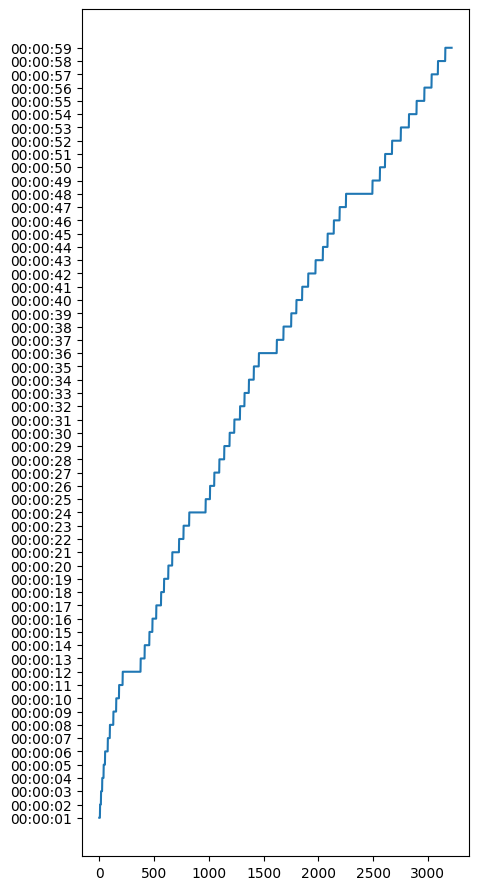

In [18]:
plt.figure(figsize = (5,11))
plt.plot(query.df['holding_time'])

# Query 2

WITH transactions AS (
    SELECT 
        "tokenId" AS token_id,
        "to" AS to_address,
        ROW_NUMBER() OVER (PARTITION BY "tokenId" ORDER BY evt_block_time DESC) AS transction_rank
    FROM erc721."ERC721_evt_Transfer"
    WHERE 
        contract_address = '\xbCe3781ae7Ca1a5e050Bd9C4c77369867eBc307e'
        AND evt_block_time >= '2022-05-19'
)

SELECT 
    COUNT(DISTINCT to_address) AS count_wallet_holders,
    COUNT(*)*1.0 / COUNT(DISTINCT to_address)*1.0 AS avg_nft_per_wallet
FROM transactions
WHERE transction_rank = 1

In [20]:
query = dune.fetch_query(2174066)
query.df

,avg_nft_per_wallet,count_wallet_holders
0,2.051919,4873
